**Cellar orqali xulosalarni yig'ib boramiz**

# Data Collecting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# kerakli kutubxonalarni o'rnatamiz

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jamshid-ds/us_cars_visualization/main/dataset/USA_cars_datasets.csv",index_col=0)
df.head() # Bizga kerakli DataFrameni df o'zgaruvchisiga saqlaymiz
# df.isna().sum()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Bizga `lot` va `vin` columnlari kerak emas. Ularni tashlab yuboramiz

# Data Cleaning and preparing

In [3]:
df.drop(["lot","vin"],axis=1,inplace=True)
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


Mashinalar uchun kilometrlarda ishlash biz uchun qulay,  Shuning uchun unga `km` ustunini qo'shamiz:

`mileage` ustunidagi ma'lumotlarni `1.60934` ga ko'paytirish orqali `km` ustunini hosil qilishimiz mumkin

In [4]:
df['km'] = df['mileage'] * 1.60934
df.drop('mileage',axis=1,inplace=True)
df.head()

,price,brand,model,year,title_status,color,state,country,condition,km
0,6300,toyota,cruiser,2008,clean vehicle,black,new jersey,usa,10 days left,441147.45278
1,2899,ford,se,2011,clean vehicle,silver,tennessee,usa,6 days left,306662.95568
2,5350,dodge,mpv,2018,clean vehicle,silver,georgia,usa,2 days left,63713.77060
3,25000,ford,door,2014,clean vehicle,blue,virginia,usa,22 hours left,103232.72364
4,27700,chevrolet,1500,2018,clean vehicle,red,florida,usa,22 hours left,10708.54836


No'malum va Noodatiy qiymatlarni yo'qotamiz

In [5]:
df['title_status'].value_counts()

clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

Bizda asosan `clean_vehicle` turidagi avtomobillar ekan

In [6]:
df['color'].value_counts()

white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
shadow black                                 5
color:                                       5
beige                                        5
oxford white                                 4
ingot silver metallic                        4
super black                                  3
billet silver metallic clearcoat             3
triple yellow

**Shuni hulosa qilishimiz mumkinki, Bizda ranglarning turlari juda ko'payib ketgan. Va asosan rang turlariga kam sonli avtomobil to'g'ri kelyapti. Biz asosiy rangga ega bo'lgan avtomobillarni qoldiramiz.**

In [7]:
list_main_colors = list(df['color'].value_counts().index)[:12]
df = df[df['color'].isin(list_main_colors)]
# df.head()
df['color'].value_counts()

white       707
black       516
gray        395
silver      300
red         192
blue        151
no_color     61
green        24
orange       20
gold         19
charcoal     18
brown        15
Name: color, dtype: int64

In [8]:
df.describe() # Data Framening sonli ustunlari haqida umumiy ma'lumotlar olamiz

,price,year,km
count,2418.000000,2418.000000,2.418000e+03
mean,18785.268817,2016.775434,8.351745e+04
std,12163.072064,3.418237,9.095709e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,3.481727e+04
50%,16900.000000,2018.000000,5.686764e+04
75%,25511.000000,2019.000000,1.021710e+05
max,84900.000000,2020.000000,1.609338e+06


Bizda Narxni 0 ga teng bo'lgan mashinalar ham mavjud. Bu DataSetning xatoligi. Biz bu qiymatlarni ustunning o'rta arfmitigiga tenglashtirishimiz mumkin edi. Bu esa Narxi O'rta arfmitikka teng bo'lgan Mashinalar ko'payib ketishiga to'g'ri kelishi mumkin. Ularni tashlab yuboramiz

---
---
---

In [9]:
df = df[df.price>10000]

---

# Visualization Part

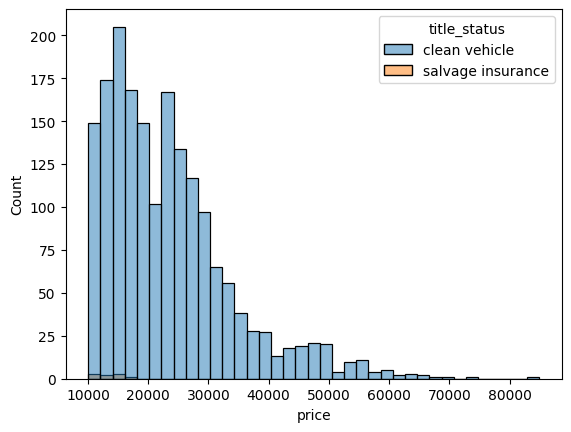

In [10]:
sns.histplot(data=df, x="price",hue="title_status")
plt.show()
#Mashina narxlari taqsimoti

In [11]:
a = list(df.columns)
for h in a:
  print(df[h].value_counts())

16500    26
13900    21
15000    19
15500    19
22500    18
         ..
36800     1
31100     1
37100     1
32800     1
30100     1
Name: price, Length: 497, dtype: int64
ford               941
dodge              335
chevrolet          221
nissan             200
gmc                 21
jeep                16
bmw                 13
buick               11
infiniti            11
mercedes-benz       10
chrysler            10
cadillac             9
kia                  8
land                 4
lexus                2
audi                 2
honda                1
lincoln              1
maserati             1
ram                  1
mazda                1
acura                1
harley-davidson      1
Name: brand, dtype: int64
door        307
f-150       213
caravan     100
durango      64
fusion       63
           ... 
sl-class      1
cx-3          1
2500hd        1
sonic         1
nvp           1
Name: model, Length: 105, dtype: int64
2019    844
2018    316
2017    269
2016    139
2015    104

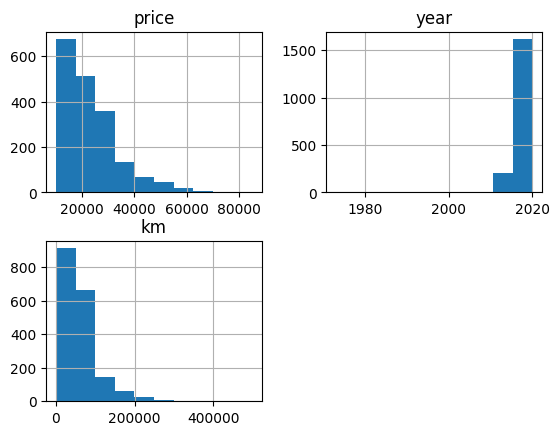

In [12]:
df.hist()
plt.xticks(rotation=90)
plt.show()

In [13]:
df.head()

,price,brand,model,year,title_status,color,state,country,condition,km
3,25000,ford,door,2014,clean vehicle,blue,virginia,usa,22 hours left,103232.72364
4,27700,chevrolet,1500,2018,clean vehicle,red,florida,usa,22 hours left,10708.54836
7,13350,gmc,door,2017,clean vehicle,gray,california,usa,20 hours left,37859.72350
8,14600,chevrolet,malibu,2018,clean vehicle,silver,florida,usa,22 hours left,15081.12514
10,10400,dodge,coupe,2009,clean vehicle,orange,georgia,usa,22 hours left,173576.97504


In [14]:
df.shape

(1821, 10)

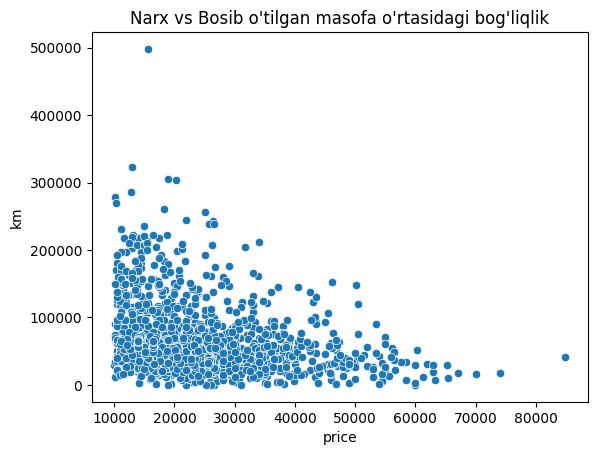

In [15]:
sns.scatterplot(data=df,x="price",y='km')
plt.title("Narx vs Bosib o'tilgan masofa o'rtasidagi bog'liqlik")
plt.show()


Bosib o'tilgan masofa 1.000.000 km dan kam bo'lgan avtomobillarni qoldiramiz

In [16]:
df = df[df['km']<1_000_000]
df.head()

,price,brand,model,year,title_status,color,state,country,condition,km
3,25000,ford,door,2014,clean vehicle,blue,virginia,usa,22 hours left,103232.72364
4,27700,chevrolet,1500,2018,clean vehicle,red,florida,usa,22 hours left,10708.54836
7,13350,gmc,door,2017,clean vehicle,gray,california,usa,20 hours left,37859.72350
8,14600,chevrolet,malibu,2018,clean vehicle,silver,florida,usa,22 hours left,15081.12514
10,10400,dodge,coupe,2009,clean vehicle,orange,georgia,usa,22 hours left,173576.97504


In [17]:
# df.head()
df.shape

(1821, 10)

---
---

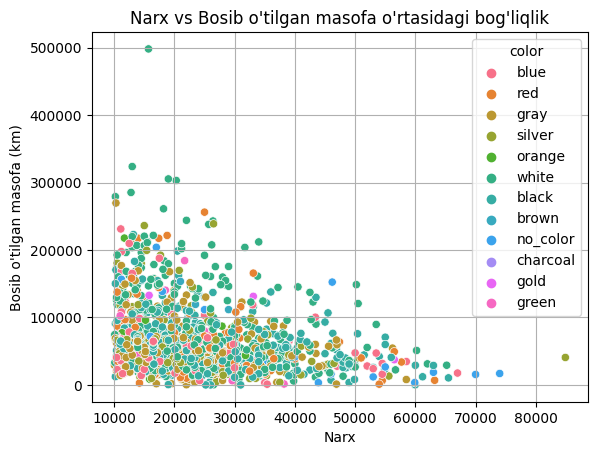

In [18]:
sns.scatterplot(data=df,x="price",y='km',hue='color')
plt.title("Narx vs Bosib o'tilgan masofa o'rtasidagi bog'liqlik")
plt.grid()
plt.xlabel("Narx")
plt.ylabel("Bosib o'tilgan masofa (km)")
plt.show()

**Xulosa-1**. Bosib o'tilgan yo'l ortgani sari Narx pasayib boradi

**Xulosa-2** Mashinaning rangi Narxga kuchli ta'sir qilmaydi

---
---
---


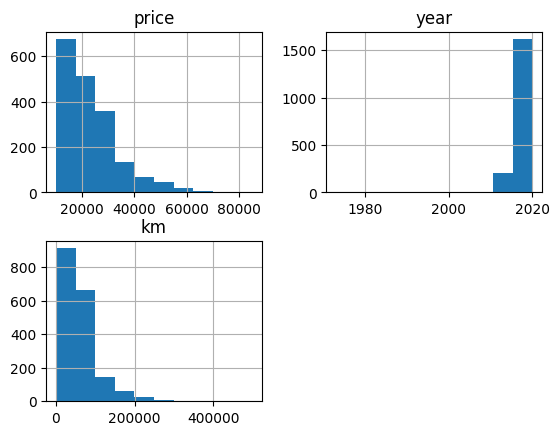

In [19]:
df.hist()
plt.show()

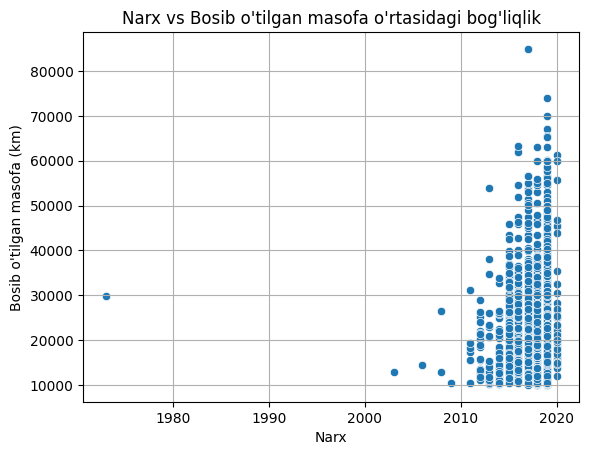

In [20]:
sns.scatterplot(data=df,x="year",y='price')
plt.title("Narx vs Bosib o'tilgan masofa o'rtasidagi bog'liqlik")
plt.grid()
plt.xlabel("Narx")
plt.ylabel("Bosib o'tilgan masofa (km)")
plt.show()

Bizda yaratilgan yili juda eski bo'lgan avtomobil bor. Uni ham tashlab yuborishga majburmiz

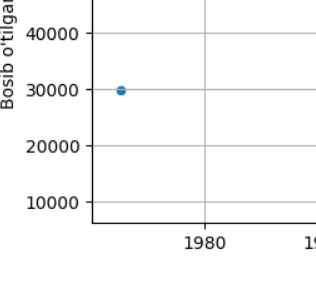

In [21]:
df = df[df.year>2000]

---
---


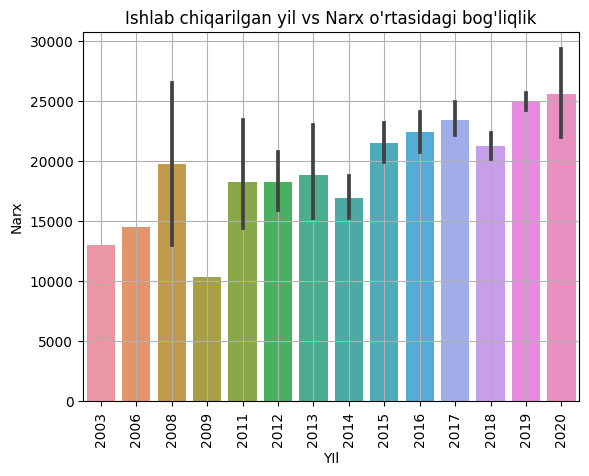

In [22]:
sns.barplot(x=df["year"],y=df['price'])
plt.title("Ishlab chiqarilgan yil vs Narx o'rtasidagi bog'liqlik")
plt.grid()
plt.xticks(rotation=90)
plt.xlabel("YIl")
plt.ylabel("Narx")
plt.show()

**Xulosa-3**: Datasetda nisbatan yangi mashinalar ko'p

Qaysi Mashina brandi qimmatroq ekanligini aniqlash uchun ozroq kod yozamiz

In [23]:
df.head()

,price,brand,model,year,title_status,color,state,country,condition,km
3,25000,ford,door,2014,clean vehicle,blue,virginia,usa,22 hours left,103232.72364
4,27700,chevrolet,1500,2018,clean vehicle,red,florida,usa,22 hours left,10708.54836
7,13350,gmc,door,2017,clean vehicle,gray,california,usa,20 hours left,37859.72350
8,14600,chevrolet,malibu,2018,clean vehicle,silver,florida,usa,22 hours left,15081.12514
10,10400,dodge,coupe,2009,clean vehicle,orange,georgia,usa,22 hours left,173576.97504


---
---

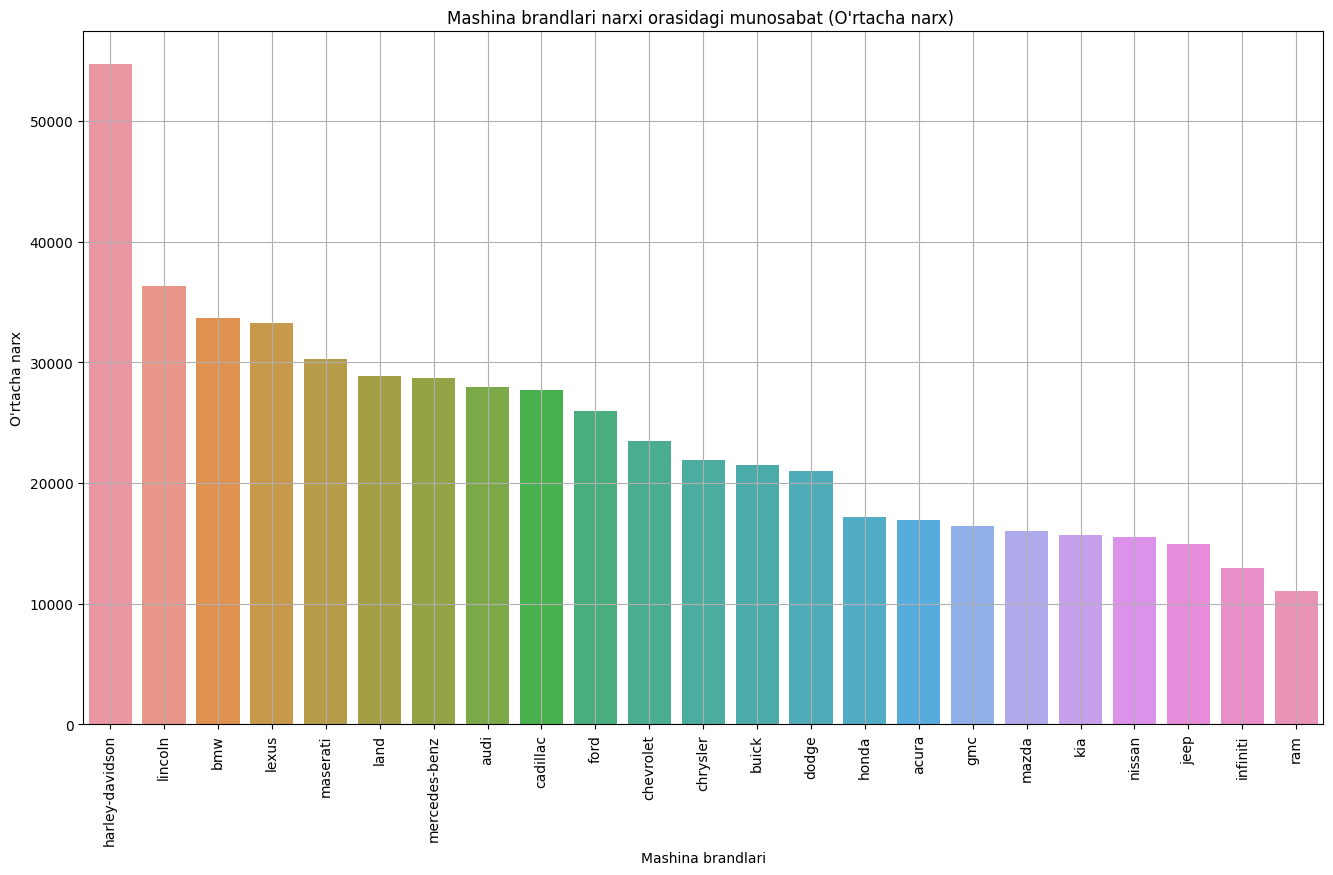

In [24]:
# 1 - qadam: Bizda qanaqa brandlar borligini aniqlab, uni listga saqlaymiz
list_brand = list(df['brand'].unique())
# 2 - qadam: Yana bir list yaratamiz va unga quyidagi mashina brandlarining o'rtacha qiymati (np.mean) ni biriktiramiz
list_mean_brand = []
for f in list_brand:
  df_m = df[df.brand==f]
  list_mean_brand.append(np.mean(df_m.price))
# 3-qadam yangi data frame yaratamiz
df_for_model_price = pd.DataFrame()
df_for_model_price['brand'] = list_brand
df_for_model_price['mean_price'] = list_mean_brand
# Qulaylik uchun DataFrameni narx bo'yicha "sort" funksiyasini bajaramiz
df_for_model_price.sort_values('mean_price', ascending=False,inplace=True)
# 4 - qadam seaborn yordamida vizualizatsiyani amalga oshiramiz
plt.figure(figsize=(16,9))
sns.barplot(x=df_for_model_price["brand"],y=df_for_model_price['mean_price'])
plt.title("Mashina brandlari narxi orasidagi munosabat (O'rtacha narx) ")
plt.grid()
plt.xlabel("Mashina brandlari")
plt.ylabel("O'rtacha narx")
plt.xticks(rotation=90)
plt.show()

**Xulosa-4**: harly_davidson brandi o'rtacha narx bo'yicha 1-o'rinda



---



---



Yuqoridagi jadvalni eng qimmat va eng arzon tip uchun ham qo'llab ko'ramiz

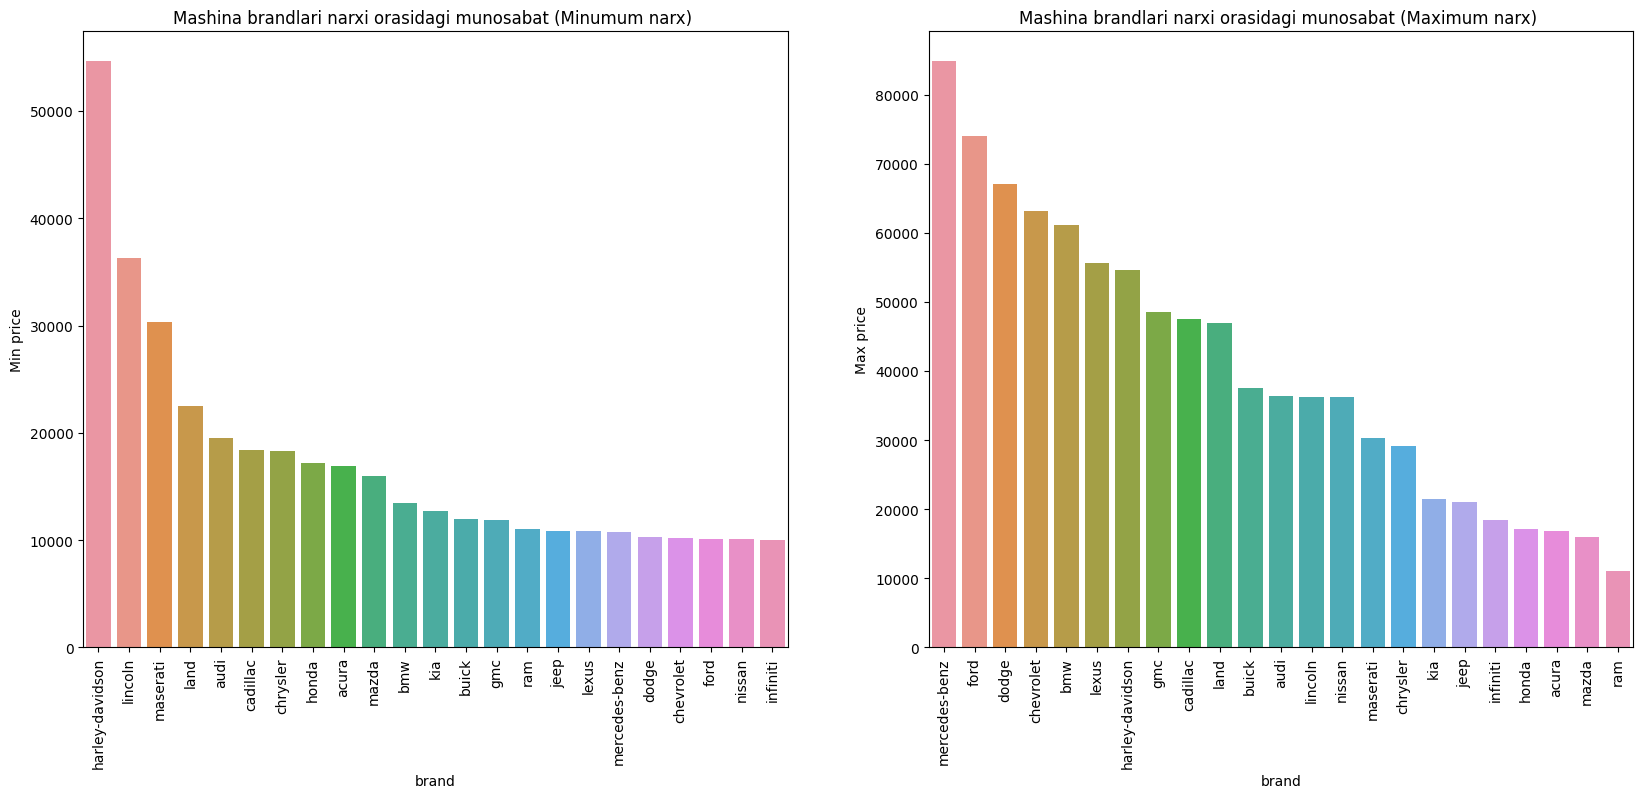

In [25]:

# Minimum qiymatlar uchun
list_min_price = []
for f in list_brand:
  df_m = df[df.brand==f]
  list_min_price.append(np.min(df_m.price))

#Maximum qiymatlar uchun
list_max_price = []
for f in list_brand:
  df_m = df[df.brand==f]
  list_max_price.append(np.max(df_m.price))
# print(list_min_price)
# print(list_max_price)
df_for_model_max_price = pd.DataFrame()
df_for_model_min_price = pd.DataFrame()

df_for_model_min_price['brand'] = list_brand
df_for_model_min_price['Min price'] = list_min_price

df_for_model_max_price['brand'] = list_brand
df_for_model_max_price['Max price'] = list_max_price


df_for_model_min_price.sort_values('Min price', ascending=False,inplace=True)
df_for_model_max_price.sort_values('Max price', ascending=False,inplace=True)
# - - - - - -
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(ax=ax[0], x=df_for_model_min_price["brand"] ,y=df_for_model_min_price['Min price'])
ax[0].set_xticklabels(df_for_model_min_price["brand"], rotation=90)
ax[0].set_title("Mashina brandlari narxi orasidagi munosabat (Minumum narx) ")


sns.barplot(ax=ax[1], x=df_for_model_max_price['brand'] ,y=df_for_model_max_price['Max price'])
ax[1].set_xticklabels(df_for_model_max_price['brand'], rotation=90)
ax[1].set_title("Mashina brandlari narxi orasidagi munosabat (Maximum narx) ")
plt.show()

**Xulusa-5**: Eng arzon avtomobil rusumi `infiniti` model hisoblanadi. Eng arzon brendlar orasidan ham 1-o'rinda `harley-davidson` brendi

**Xulosa-6**: Eng Qimmat avtomobil modeli `mercedes-benz`ga tegishli.



---



---
# Barcha xulosalar


---
**Xulosa-1**. Bosib o'tilgan yo'l ortgani sari Narx pasayib boradi

**Xulosa-2** :Mashinaning rangi Narxga kuchli ta'sir qilmaydi

**Xulosa-3**: Datasetda nisbatan yangi mashinalar ko'p

**Xulosa-4**: `harly_davidson` brandi o'rtacha narx bo'yicha 1-o'rinda

**Xulusa-5**: Eng arzon avtomobil rusumi infiniti model hisoblanadi. Eng arzon brendlar orasidan ham 1-o'rinda harley-davidson brendi

**Xulosa-6**: Eng Qimmat avtomobil modeli mercedes-benzga tegishli.


#Machine Learning to predict `price`

##Preparing data

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#Kerakli kutubxonalarni o'rnatamiz

In [27]:
#DataFrameni train qilinadigan va bashorat qilinadigan qismlarga ajratdik
x = df.drop('price',axis=1)
y = df['price']

#Train va test setlarga ajratamiz
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=2)

#Int(float) va Object turidagi ustunlarni alohida o'zgaruvchilarga saqlaymiz
nums, cats = ['year',"km"], ["brand",	"model", "title_status",	"color",	"state",	"country",	"condition"]

### Pipeline

In [28]:
num_pipeline = Pipeline([
    ('StandardScaler', StandardScaler())
])

cats_pipeline = Pipeline([
    ("O_Encoder", OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('nums', num_pipeline, nums),
    ('cats', cats_pipeline, cats)
])

train_x_pre = full_pipeline.fit_transform(train_x)
test_x_pre = full_pipeline.transform(test_x)

##Machine Learning part

**Biz 7 ta modelni sinab ko'ramiz**
<br>

<br>
1-Linear Regression

2-Ridge Regression

3-Lasso Regression

4-Decision Tree Regressor

5-Random Forest Regressor

6-Gradient Boosting Regressor

7-Support Vector Regression (SVR)

In [29]:
#Linear Regression
linear_model = LinearRegression()

#Ridge Regression
ridge_model = Ridge(alpha=1.0)

#Lasso Regression
lasso_model = Lasso(alpha=1.0)

#Decision Tree Regressor
dt_model = DecisionTreeRegressor()

#Random Forest Regressor
rf_model = RandomForestRegressor()

#GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

#Support Vector Regression
svr_model = SVR(kernel='linear')


# Training
linear_model.fit(train_x_pre, train_y)
ridge_model.fit(train_x_pre, train_y)
lasso_model.fit(train_x_pre, train_y)
dt_model.fit(train_x_pre, train_y)
rf_model.fit(train_x_pre, train_y)
gb_regressor.fit(train_x_pre, train_y)
svr_model.fit(train_x_pre, train_y)

SVR(kernel='linear')

In [30]:
list_models_name = ['linear_model_predict', "ridge_model_predict", "lasso_model_predict", "dt_model_predict", "rf_model_predict", "gb_regressor_predict", "svr_model_predict"]

linear_model_predict = linear_model.predict(test_x_pre)
ridge_model_predict = ridge_model.predict(test_x_pre)
lasso_model_predict = lasso_model.predict(test_x_pre)
dt_model_predict = dt_model.predict(test_x_pre)
rf_model_predict = rf_model.predict(test_x_pre)
gb_regressor_predict = gb_regressor.predict(test_x_pre)
svr_model_predict = svr_model.predict(test_x_pre)

In [31]:
df_pred = pd.DataFrame()
df_pred['Real'] = test_y
df_pred['linear_model_predict'] = linear_model_predict
df_pred['ridge_model_predict'] = ridge_model_predict
df_pred['lasso_model_predict'] = lasso_model_predict
df_pred['dt_model_predict'] = dt_model_predict
df_pred['rf_model_predict'] = rf_model_predict
df_pred['gb_regressor_predict'] = gb_regressor_predict
df_pred['svr_model_predict'] = svr_model_predict
df_pred

,Real,linear_model_predict,ridge_model_predict,lasso_model_predict,dt_model_predict,rf_model_predict,gb_regressor_predict,svr_model_predict
1762,31600,25772.140454,26514.559810,26197.297743,23400.0,25587.81,26118.776121,22319.353447
621,21500,22080.947143,22887.227225,22667.119663,21500.0,24229.57,23859.593213,21693.048762
675,22400,19065.245554,19960.721930,19510.146846,22600.0,22938.11,24542.906980,22145.701334
1229,14300,18222.370641,17813.070597,18169.828391,38200.0,22183.12,21260.696223,22346.010231
1127,23800,25685.200615,25559.527816,25741.134340,22800.0,23633.00,23848.479493,21669.667167
...,...,...,...,...,...,...,...,...
2387,14600,15425.326190,15945.887315,15633.574876,15100.0,15566.00,17297.965056,21297.463384
1962,24300,29605.802492,29332.842546,29365.468323,22800.0,22419.85,22700.691995,22037.326964
1372,36000,40684.925195,39138.021437,40265.340177,38200.0,39179.00,37386.207984,21544.938990
1667,34500,30301.340772,30354.160104,30223.400568,22700.0,24736.54,27691.907443,22517.320794


##Model evaluation

In [32]:
print("MAPE")
for i in range(len(list_models_name)):
  mape = mean_absolute_percentage_error(test_y, df_pred[list_models_name[i]]) * 100
  print(f"{list_models_name[i]} : {round(mape,2)} %")
print("")
print("MAE")
for i in range(len(list_models_name)):
  mae = mean_absolute_error(test_y, df_pred[list_models_name[i]]) * 100
  print(f"{list_models_name[i]} : {round(mae,2)}")

MAPE
linear_model_predict : 18.51 %
ridge_model_predict : 18.9 %
lasso_model_predict : 18.33 %
dt_model_predict : 24.36 %
rf_model_predict : 19.74 %
gb_regressor_predict : 23.44 %
svr_model_predict : 34.24 %

MAE
linear_model_predict : 390167.14
ridge_model_predict : 394558.88
lasso_model_predict : 387587.52
dt_model_predict : 495328.57
rf_model_predict : 402908.48
gb_regressor_predict : 463888.39
svr_model_predict : 697602.65


Yana bir xulosa: Bizda chiziqli regressiya yaxshiroq natija bermoqda

In [35]:
df.to_csv('us_cars_prepared.csv',index=False)